# Cosmology: Hubble Parameters

We create some test data that will be used to fit our model. Let’s assume a linear relationship between the predictor and the response variable, so we take a linear model and add some noise.

In [2]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import emcee
import pandas as pd
import plotly.graph_objects as go


plt.style.use(['science', 'notebook', 'grid'])

In [3]:
#sample data
z=np.array([0.07  , 0.09  , 0.12  , 0.17  , 0.179 , 0.199 , 0.2   , 0.27  ,
       0.28  , 0.352 , 0.3802, 0.4   , 0.4004, 0.4247, 0.4497, 0.47  ,
       0.4783, 0.48  , 0.5929, 0.6797, 0.7812, 0.8754, 0.88  , 0.9   ,
       1.037 , 1.3   , 1.363 , 1.43  , 1.53  , 1.75  , 1.965 ]) #z


hz= np.array([ 69. ,  69. ,  68.6,  83. ,  75. ,  75. ,  72.9,  77. ,  88.8,
        83. ,  83. ,  95. ,  77. ,  87.1,  92.8,  89. ,  80.9,  97. ,
       104. ,  92. , 105. , 125. ,  90. , 117. , 154. , 168. , 160. ,
       177. , 140. , 202. , 186.5]) #H(z)

shz=np.array([19.6, 12. , 26.2,  8. ,  4. ,  5. , 29.6, 14. , 36.6, 14. , 13.5,
       17. , 10.2, 11.2, 12.9, 34. ,  9. , 62. , 13. ,  8. , 12. , 17. ,
       40. , 23. , 20. , 17. , 33.6, 18. , 14. , 40. , 50.4]) #sigma H(z)


In [4]:
#adding noise to the data
x=[1, 2, 3, 4, 5,6,7,8,9,10]
y=[]
yerr=[]
for i in x:
    ya=3*i+2
    yb= np.random.normal(0,ya*0.1 , 1)

    y.append(ya+yb)
    yerr.append(yb)

C:\Users\priya\AppData\Local\Temp\ipykernel_19012\267831346.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(z, hz, shz, fmt='.k', color='blue',ecolor='green', elinewidth=1, capsize=3,label='Hubble data')


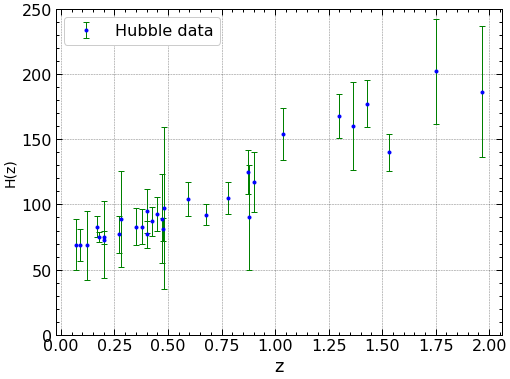

In [5]:
#plotting the data with the error bars
plt.errorbar(z, hz, shz, fmt='.k', color='blue',ecolor='green', elinewidth=1, capsize=3,label='Hubble data')
plt.ylim(0, 250)
plt.xlabel('z',fontsize=18)
plt.ylabel('H(z)',fontsize=14)
plt.title('')
plt.legend(loc="upper left",prop={'size': 16})
#plt.tight_layout()

# Defining the statistical model

The next step is to specify the statistical model.

$$H(z)= H_0 \sqrt{\Omega_m (1+z)^3 +(1-\Omega_m)}$$

For a Gaussian Distribution, probability of occurrence of each data point is: $$P(y_i) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} e^{- \frac{(y^{obs}_{i} - y^{th})^2}{2 \sigma^2}}$$
And the Likelihood is: $$L(x_i|P) = \prod_{i=1}^{N} P(y_i)$$

For the above Theoretical Model, the Likelihood is: 
$$L(x_i|\Omega_m, \Omega_\Lambda) = \prod^{N}_{i=1} \dfrac{1}{\sqrt{2 \pi \sigma^2}}  e^{- \frac{[H^{obs}_i - H_0 \{ \Omega_{m_0} (1+z)^3 + \Omega_{\Lambda_0} \}^{0.5}]^2}{2 \sigma^2}}$$ 
$$\Rightarrow -2 \ln L = \sum \dfrac{(H^{obs}_i - H_0 \{ \Omega_{m_0} (1+z)^3 + \Omega_{\Lambda_0} \}^{0.5} )^2}{\sigma^2} \equiv \chi^2$$

In [6]:
#defining log likelihood or chi^2
def log_likelihood(z,hz,shz,h0,om):
    n=len(z)
    sum=0
    for i in range(0,n):
        sum= sum+ (hz[i]-h0*(om*(1+z[i])**3+(1-om))**0.5)**2/(shz[i])**2
    return -(sum)


We know that $\Omega_m \in [ 0,1 ]$ and $H_0 \in [ 40,100 ]$. Using this information, we look at how these two parameters vary with the log(likelihood) or $\chi^2$ values by keeping one of them constant and varying the other.

Text(0.5, 1.0, 'Variation of $\\Omega_m$ with $Log\\ likelihood$ considering $H_0 = 70$')

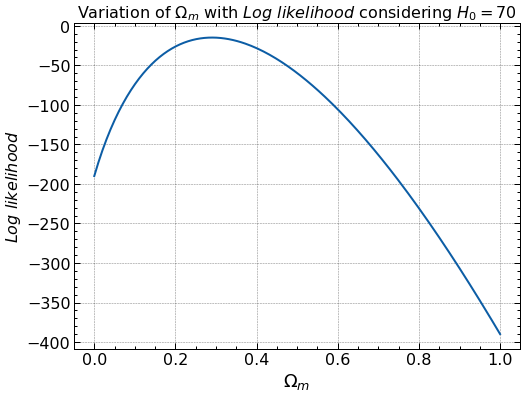

In [7]:
om_samples = np.linspace(0,1,200)
pp = log_likelihood(z,hz,shz,70,om_samples)
plt.plot(om_samples,pp)
plt.xlabel(r'$\Omega_m$',fontsize=18)
plt.ylabel(r'$Log\ likelihood$',fontsize=16)
plt.title(r'Variation of $\Omega_m$ with $Log\ likelihood$ considering $H_0 = 70$')

Text(0.5, 1.0, 'Variation of $H_0$ with $Log\\ likelihood$ considering $\\Omega_m = 0.3$')

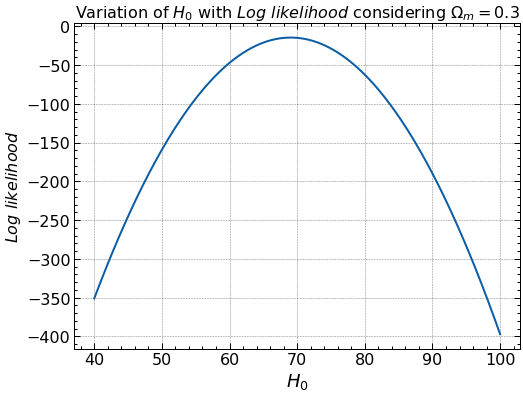

In [8]:
h0_samples = np.linspace(40,100,200)
pp = log_likelihood(z,hz,shz,h0_samples,0.3)
plt.plot(h0_samples,pp)
plt.xlabel(r'$H_0$',fontsize=18)
plt.ylabel(r'$Log\ likelihood$',fontsize=16)
plt.title(r'Variation of $H_0$ with $Log\ likelihood$ considering $\Omega_m = 0.3$')

Plotting the log likelihood as a surface with $H_0$ on the $x-axis$ and $\Omega_m$ on the $y-axis$.


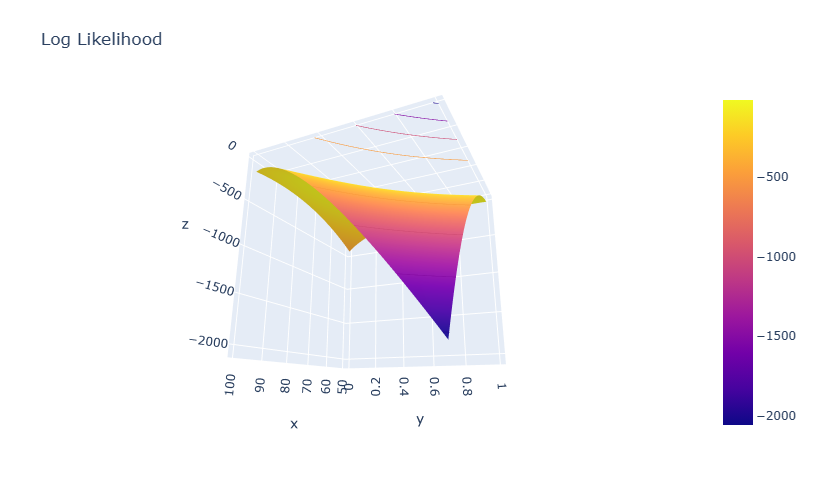

In [9]:
h0_samples = np.linspace(50, 100, 1000)
om_samples = np.linspace(0, 1, 100)

X, Y = np.meshgrid(h0_samples, om_samples)
Z = log_likelihood(z,hz,shz,X,Y)
z_data = pd.DataFrame(Z)


fig = go.Figure(data=[go.Surface(z=z_data.values,x=h0_samples,y=om_samples)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Log Likelihood', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

# Adding Priors

Trial with Uniform Priors

In [10]:
#remember that we are using logarithms of probability, likelihood, prior and posterior to make calculations easier and also because a function and its lograithm peak at the same point
def log_prior_uniform(h0,om):
    if 50< h0 < 100 and 0< om < 1:
        return 0.0
    return -np.inf

Now, with a Gaussian Prior

In [11]:
def log_prior_gauss(h0,om):
    h0prior = -(h0-70)**2/(3**2)
    omprior = -(om-0.3)**2/(0.1**2)
    net= h0prior + omprior
    return net

# Defining Posterior

In [12]:
def log_posterior(h0,om):
    func= log_likelihood(z,hz,shz,h0,om)+ log_prior_uniform(h0,om)
    return func

In [13]:
a = np.linspace(51, 99, 100)
b = np.linspace(0.01, 0.99, 100)

X, Y = np.meshgrid(a,b)
Z = log_posterior(X,Y)

z_data = pd.DataFrame(Z)


fig = go.Figure(data=[go.Surface(z=z_data.values,x=a,y=b)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Log Posterior', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Posterior vs parameter plot

## Metropolis-Hastings algorithm

One of the most frequent applications of this algorithm (as in this example) is sampling from the posterior density in Bayesian statistics. In principle, however, the algorithm may be used to sample from any integrable function. So, the aim of this algorithm is to jump around in parameter space, but in a way that the probability to be at a point is proportional to the function we sample from (this is usually called the target function). In our case this is the posterior defined above.

This is achieved by:

1) Starting at a random parameter value known as **initial value**

2) Choosing a new parameter value close to the old value based on some probability density that is called the **proposal function**

3) Jumping to this new point with a probability p(new)/p(old), where p is the **target function or posterior density**, and p>1 means jumping as well


It’s fun to think about why that works, but for the moment I can assure you it does – when we run this algorithm, distribution of the parameters it visits converges to the target distribution p.

## Proposal Function

In [22]:
import numpy as np
nchain=[]
achain=[]
bchain=[]
posteriorchain=[]
a0=70
b0=0.3                                 # initial value
s=100000                            # no of steps
burnout_time= 1000                    # Burnout_time
t=0 #no. of values accepted

for i in range(1,s):
    anew= a0+np.random.normal(0,0.1)
    bnew= b0+np.random.normal(0,0.01)
  #print("anew, bnew=",anew,bnew)
  #print("oldp=",log_posterior(a0,b0))
  #print("newp=",log_posterior(anew,bnew))
  #print("diff=", log_posterior(a0,b0)- log_posterior(anew,bnew))
    u=np.random.uniform(0,1)
    alpha= np.exp(log_posterior(anew,bnew)- log_posterior(a0,b0))

    if log_posterior(anew,bnew)> log_posterior(a0,b0):
        t=t+1
        if t>=burnout_time:
            nchain.append(t)
            achain.append(anew)
            bchain.append(bnew)
            posteriorchain.append(log_posterior(a0,b0))
        a0=anew
        b0=bnew

    elif alpha >= u:
        t=t+1
        if t>=burnout_time:
            nchain.append(t)
            achain.append(anew)
            bchain.append(bnew)
            posteriorchain.append(log_posterior(a0,b0))
        a0=anew
        b0=bnew

    else:
        a0=a0
        b0=b0

ar = t/s #no. of values accepted/total no. of steps
print("Acceptance Ratio = ",ar)

Acceptance Ratio =  0.85121


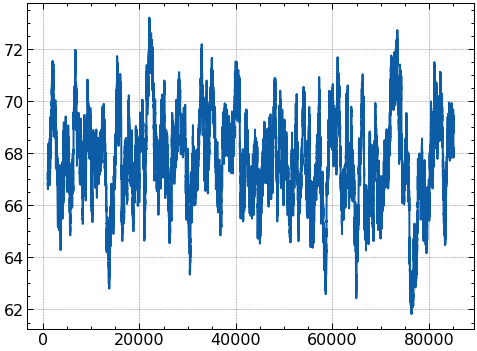

In [23]:
plt.plot(nchain,achain)

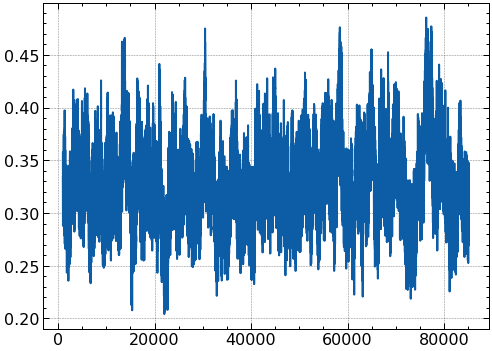

In [24]:
plt.plot(nchain,bchain)

In [28]:
sl,m,sm= np.percentile(achain,[16, 50, 84],axis=0)
mean=m
neg_error= m-sl #-16%ile
pos_error= sm-m #+16%ile

print(r"MCMC OUTCOME:$H_0$ = {} + {} -{}".format(mean,pos_error,neg_error))

MCMC OUTCOME:$H_0$ = 67.77287090619107 + 1.697386787452288 -1.6944419011855558


In [29]:
sl,m,sm= np.percentile(bchain,[16, 50, 84],axis=0)
mean=m
neg_error= m-sl
pos_error= sm-m

print(r"MCMC OUTCOME:$\Omega_m$ = {} + {} -{}".format(mean,pos_error,neg_error))

MCMC OUTCOME:$\Omega_m$ = 0.32655075325508626 + 0.03701654379406327 -0.0344619736551931


In [30]:
import corner

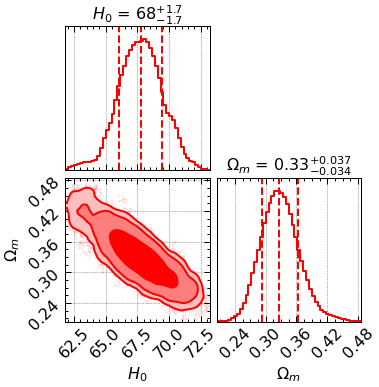

In [33]:
cc=np.array([achain,bchain])
bb=cc.transpose()
fig = corner.corner(bb,bins=50,labels=["$H_0$",r"$\Omega_m$"],
                    color="red",
                    quantiles=[0.16, 0.5, 0.84],
                    plot_contours=True,
                    fill_contours=True,
                    levels=(0.68,0.95,0.99,),
                    plot_datapoints=True,
                    smooth=True, smooth1d=True,
                    title_fmt=".2g",
                    show_titles=True,
                    divergences=True)

plt.savefig("Hubble Parameter Estimation MCMC.png",dpi=200)
plt.show()

(array([  18.,   68.,  205.,  191.,  200.,  252.,  248.,  314.,  278.,
         266.,  350.,  362.,  692., 1114., 1379., 1497., 1772., 2303.,
        2962., 3097., 3416., 3943., 3930., 4164., 4392., 4125., 4329.,
        4382., 4400., 4003., 3783., 3582., 3022., 2684., 1981., 1756.,
        1840., 1816., 1412., 1018.,  759.,  510.,  350.,  292.,  294.,
         205.,   79.,   32.,   36.,   19.]),
 array([61.82394983, 62.05167094, 62.27939205, 62.50711316, 62.73483427,
        62.96255538, 63.19027649, 63.4179976 , 63.64571871, 63.87343982,
        64.10116093, 64.32888204, 64.55660315, 64.78432426, 65.01204537,
        65.23976648, 65.46748759, 65.6952087 , 65.92292981, 66.15065092,
        66.37837203, 66.60609314, 66.83381425, 67.06153536, 67.28925647,
        67.51697758, 67.74469869, 67.9724198 , 68.20014091, 68.42786202,
        68.65558313, 68.88330424, 69.11102535, 69.33874646, 69.56646757,
        69.79418868, 70.02190979, 70.2496309 , 70.47735201, 70.70507312,
        70.93279

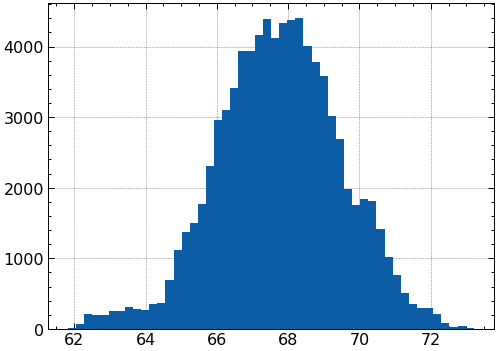

In [36]:
plt.hist(achain,bins=50)

(array([8.000e+00, 1.100e+01, 1.300e+01, 3.300e+01, 5.100e+01, 1.140e+02,
        2.070e+02, 2.520e+02, 4.600e+02, 6.610e+02, 1.022e+03, 1.435e+03,
        1.931e+03, 2.396e+03, 2.784e+03, 3.340e+03, 4.008e+03, 4.283e+03,
        4.808e+03, 4.929e+03, 5.366e+03, 5.156e+03, 5.182e+03, 5.016e+03,
        4.690e+03, 4.296e+03, 3.892e+03, 3.312e+03, 2.808e+03, 2.343e+03,
        1.977e+03, 1.645e+03, 1.263e+03, 9.280e+02, 7.620e+02, 5.730e+02,
        4.430e+02, 3.980e+02, 2.920e+02, 2.160e+02, 2.240e+02, 1.670e+02,
        1.240e+02, 9.300e+01, 9.200e+01, 6.200e+01, 3.400e+01, 1.700e+01,
        4.000e+00, 1.000e+00]),
 array([0.20410443, 0.20973113, 0.21535783, 0.22098454, 0.22661124,
        0.23223794, 0.23786464, 0.24349135, 0.24911805, 0.25474475,
        0.26037145, 0.26599815, 0.27162486, 0.27725156, 0.28287826,
        0.28850496, 0.29413167, 0.29975837, 0.30538507, 0.31101177,
        0.31663848, 0.32226518, 0.32789188, 0.33351858, 0.33914528,
        0.34477199, 0.35039869, 0.35

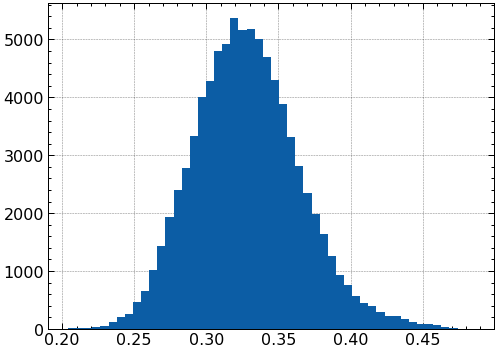

In [37]:
plt.hist(bchain,bins=50)